In [47]:
import pandas as pd 
import numpy as np
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

# Set option max columns display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)

In [2]:
df_ss = pd.read_csv('sample_submission.csv')

In [4]:
df_ss

,Unnamed: 0,id,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,...,pred_9,pred_10,pred_11,pred_12,pred_13,pred_14,pred_15,pred_16,pred_17,pred_18
0,0,132396290461,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,1,129766528471,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,2,103051371424,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
3,3,96400173701,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
4,4,109718870743,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167889,167889,73581128466,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
167890,167890,80427069452,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
167891,167891,98727571424,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
167892,167892,118532573410,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [17]:
df_train = df_train.drop(columns = 'Unnamed: 0')
df_test = df_test.drop(columns = 'Unnamed: 0')

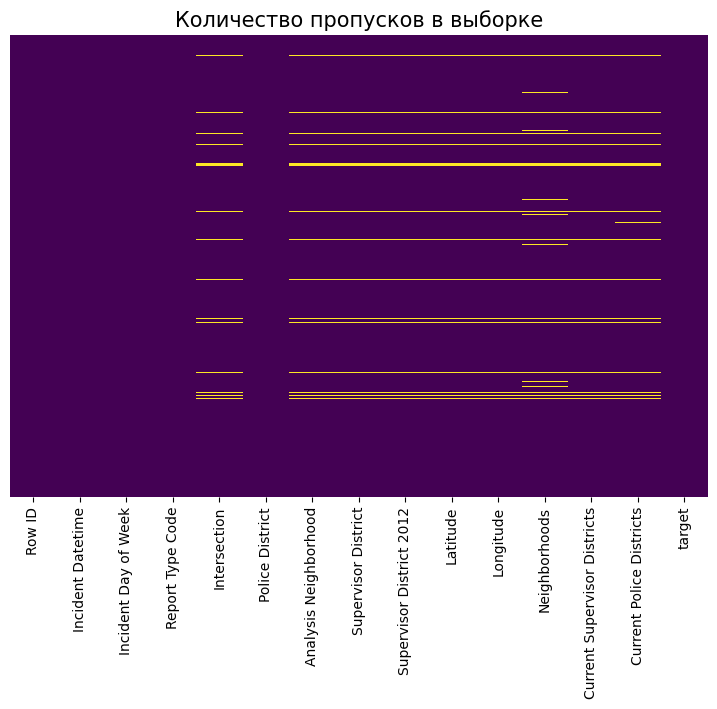

In [44]:
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Количество пропусков в выборке', fontsize=15)
sns_heatmap = sns.heatmap(df_train.isnull(),
                          yticklabels=False,
                          cbar=False,
                          cmap='viridis')

In [37]:
# описательная таблица
def descr_table(df: pd.DataFrame) -> pd.DataFrame:
    list_item = []
    for col in df.columns:
        list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
    desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
    return desc_df


In [38]:
descr_table(df_train)

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Row ID,int64,0,0.000000,391750,"[86814469434, 112210668395, 79810969452, 12778..."
1,Incident Datetime,object,0,0.000000,245975,"[2019-11-08 14:00:00, 2022-02-15 16:30:00, 201..."
2,Incident Day of Week,object,0,0.000000,7,"[Friday, Tuesday, Sunday, Saturday]"
3,Report Type Code,object,0,0.000000,4,"[IS, II, VS, VI]"
4,Intersection,object,17129,4.372431,6364,"[MARKET ST \ POWELL ST, FRESNO ST \ GRANT AVE,..."
5,Police District,object,0,0.000000,11,"[Tenderloin, Central, Ingleside, Mission]"
6,Analysis Neighborhood,object,17225,4.396937,41,"[Financial District/South Beach, North Beach, ..."
7,Supervisor District,float64,17363,4.432163,11,"[6.0, 3.0, 11.0, 9.0]"
8,Supervisor District 2012,float64,17196,4.389534,11,"[3.0, 11.0, 10.0, 8.0]"
9,Latitude,float64,17129,4.372431,6451,"[37.784560141211806, 37.79848980264107, 37.797..."


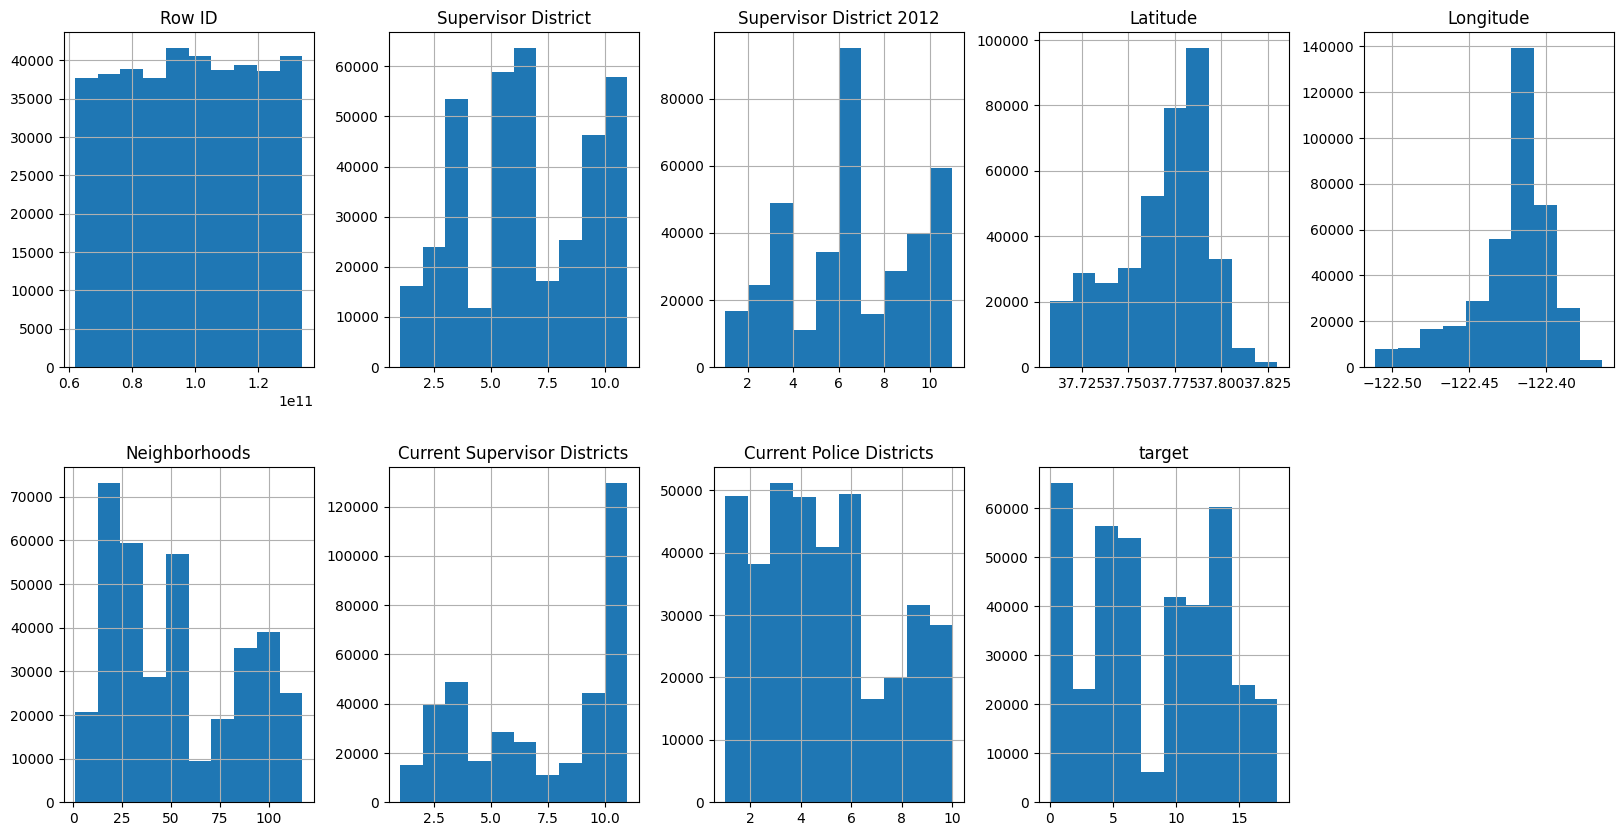

In [67]:
df_train.hist(figsize=(20, 10), layout=(-1, 5))
plt.show()

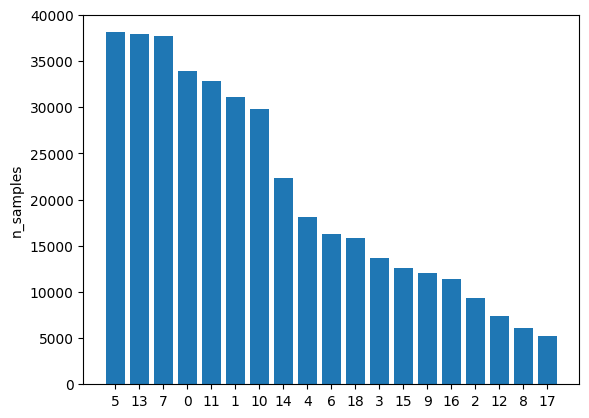

In [59]:
# ДИЗбаланс классов
dfg = df_train['target'].value_counts(dropna=False).reset_index().sort_values(by='count', ascending=False)
plt.bar(dfg['target'].astype(str), dfg['count'])
plt.ylabel("n_samples")
# plt.ylim([0, 75])
plt.show()

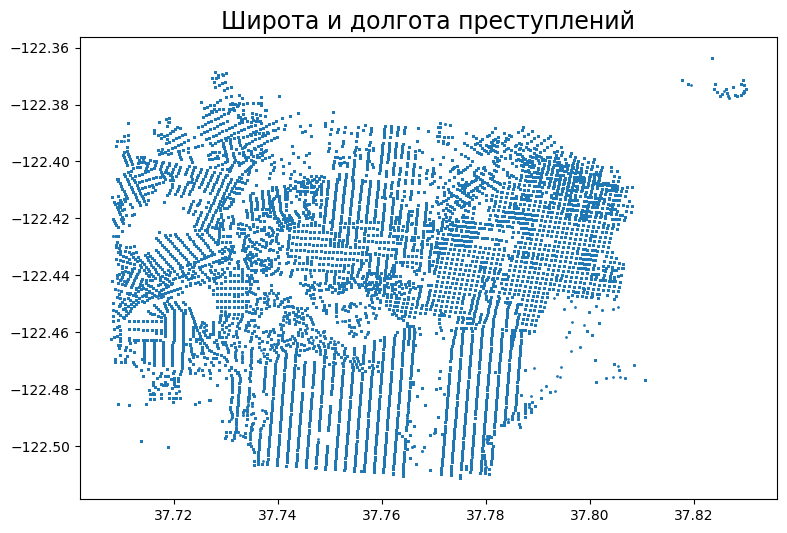

In [65]:
plt.figure(figsize = (9, 6))
plt.scatter(df_train['Latitude'], df_train['Longitude'], s=1)
plt.title('Широта и долгота преступлений', fontsize=17)

plt.show()

In [66]:
# как будто хорошо будет натравить сюда UMAP

In [72]:
# фик корреляция с кат фичами 
import phik

plt.figure(figsize=(8, 8))

dataset = df_train.drop(columns = ['Incident Datetime', 'Row ID'])
sotred_columns = (
    dataset.phik_matrix(interval_cols=dataset.columns)
    .round(2)
    .sort_values("is_red", ascending=False, axis=1)
    .columns
)

heatmap = sns.heatmap(
    dataset.phik_matrix(interval_cols=dataset.columns)
    .round(2)
    .sort_values("is_red", ascending=False, axis=1)
    .reindex(sotred_columns),
    annot=True,
    square=True,
    cmap="Blues",
    vmax=1,
    vmin=0,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Phik heatmap sorted by target", fontdict={"fontsize": 18}, pad=16)
plt.show()

In [78]:
import catboost

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject